# Практическая работа 3. Классификация ирисов Фишера с помощью метода kNN. Использование ансамблевых моделей на основе деревьев решений

## 1. Используя метод k-NN, решить задачу классификации ирисов Фишера.

Подгрузка набора данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Разделение датасета на данные и целевой признак

In [ ]:
X=iris.data
y=iris.target

Графики распределениия чашелистника и лепестка

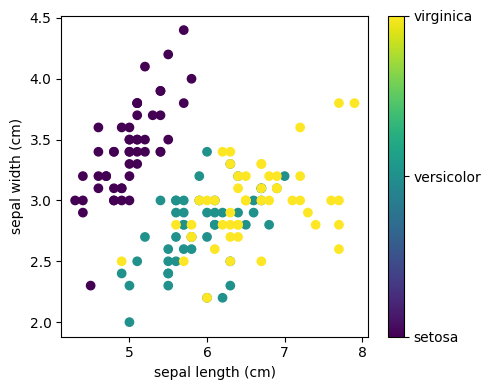

In [ ]:
# The indices of the features that we are plotting (class 0 & 1)
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

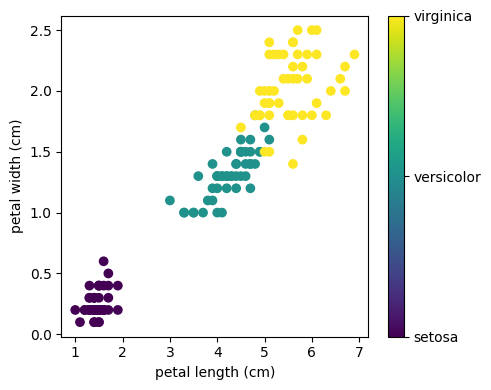

In [ ]:
# The indices of the features that we are plotting (class 2 & 3)
x_index = 2
y_index = 3
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

Создание массивов X и y входных данных и меток классов, соответственно.

Создание небольшого датасета


In [ ]:
X=iris.data
y=iris.target

dataset = X[:150:15]
output = y[:150:15]

Реализация основных функций

train_set - матрица обучающих данных, каждая строка которой представляет один объект

labels - вектор меток классов для обучающих данных

test - матрица тестовых данных, каждая строка которой представляет один объект

num_neighbors - количество ближайших соседей, которые нужно выбрать

In [ ]:
import math
import numpy as np

# Вычисляет расстояние между двумя строками, представленными в виде списков
def euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return math.sqrt(distance)


# Функция находит k ближайших соседей для каждой тестовой записи в наборе данных.
def get_neighbors_demo(train_set, labels, test_row, num_neighbors):
    distances = []
    for i in range(len(train_set)):
        dist = euclidean_distance(train_set[i], test_row)
        distances.append(( dist, labels[i], train_set[i]))
    distances.sort()
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i])

    return neighbors

def get_neighbors(train_set, labels, test_row, num_neighbors):
    distances = []
    for i in range(len(train_set)):
        dist = euclidean_distance(train_set[i], test_row)
        distances.append(( dist, labels[i]))
    distances.sort()
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i])

    return neighbors

Проверка работы функции Евклидова расстояния между точкой 5 и каждым значением остального набора

In [ ]:
for i in range(10):
  print(euclidean_distance(dataset[i], dataset[5]))

3.59722114972099
3.4899856733230297
3.539774004085572
3.66742416417845
2.128379665379276
0.0
1.1874342087037915
2.5159491250818244
1.6217274740226855
2.2158519806160335


Проверка работы функции подбора количества соседей

Выведено расстояние, количество соседей и набор точек соседа

In [ ]:
neighbors = get_neighbors_demo(dataset, output, dataset[5], 3)
for neighbor in neighbors:
  print(neighbor)


(0.0, 1, array([6.6, 3. , 4.4, 1.4]))
(1.1874342087037915, 1, array([5.5, 2.6, 4.4, 1.2]))
(1.6217274740226855, 2, array([6.9, 3.2, 5.7, 2.3]))


Функция классификации

In [ ]:
import numpy as np

def predict_classification(train_set, labels, test_row, num_neighbors):
    neighbors = get_neighbors(train_set, labels, test_row, num_neighbors)
    classes = [label for _, label in neighbors]
    prediction = max(set(classes), key=classes.count)
    return prediction


Проверка функции

In [ ]:
prediction = predict_classification(dataset, output, dataset[5], 3)
print('Expected %d, Got %d.' % (output[5], prediction))


Expected 1, Got 1.


Функция KNN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def k_nearest_neighbors(train_set, labels, test, num_neighbors):
    predictions = []
    for i in range(len(test)):
        neighbors = get_neighbors(train_set, labels, test[i], num_neighbors)
        classes = [label for _, label in neighbors]
        prediction = max(set(classes), key=classes.count)
        predictions.append(prediction)
    return predictions


Проверка функции KNN, предсказания класса

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
predictions = k_nearest_neighbors(X_train, y_train, X_test, 1)
print(predictions)
print(y_test)

[1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0]
[1 1 1 2 1 0 1 1 2 1 2 1 2 1 2 0 0 0 2 0 0 2 1 2 1 2 1 1 2 0]


Точность модели, Доля правильных ответов

In [ ]:
pos = 0
for i in range(y_test.size):
    if y_test[i] == predictions[i]:
      pos += 1
pos/y_test.size

0.9333333333333333

График зависимости доли правильных ответов от количества соседей и  доли тестовой выборки

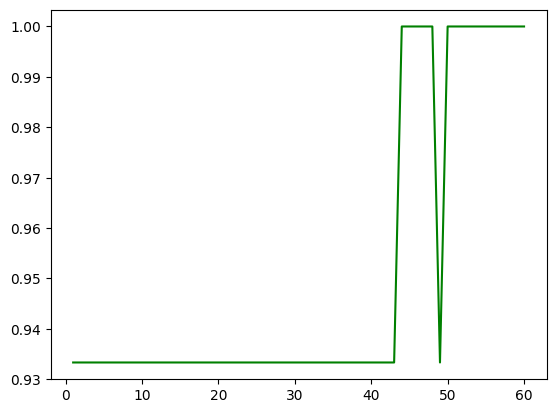

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
k_neib = []
kk = np.linspace(1, 60, 60)

for i in range(1, 61, 1):
    predictions = k_nearest_neighbors(X_train, y_train, X_test, i)
    pos = 0
    for j in range(y_test.size):
        if y_test[j] == predictions[j]:
          pos += 1
    k_neib.append(pos/y_test.size)

plt.plot( kk, k_neib, color = "g")

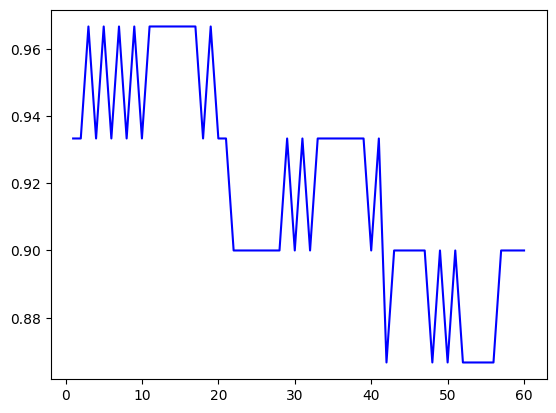

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
k_neib = []
kk = np.linspace(1, 60, 60)

for i in range(1, 61, 1):
    predictions = k_nearest_neighbors(X_train, y_train, X_test, i)
    pos = 0
    for j in range(y_test.size):
        if y_test[j] == predictions[j]:
          pos += 1
    k_neib.append(pos/y_test.size)

plt.plot( kk, k_neib, color = "b")

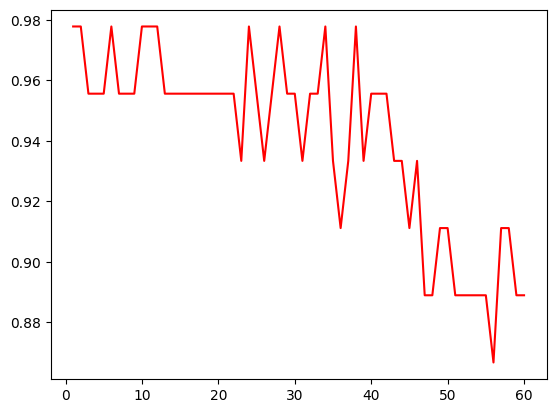

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
k_neib = []
kk = np.linspace(1, 60, 60)

for i in range(1, 61, 1):
    predictions = k_nearest_neighbors(X_train, y_train, X_test, i)
    pos = 0
    for j in range(y_test.size):
        if y_test[j] == predictions[j]:
          pos += 1
    k_neib.append(pos/y_test.size)

plt.plot( kk, k_neib, color = "r")

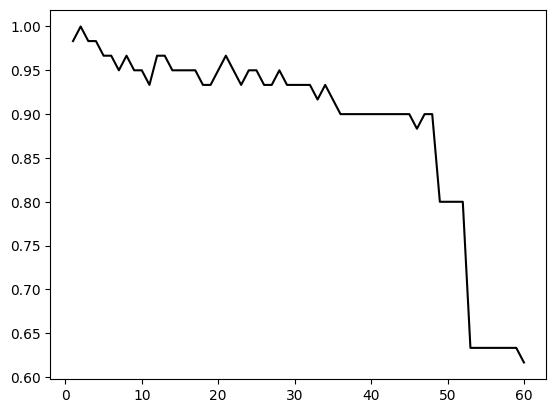

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
k_neib = []
kk = np.linspace(1, 60, 60)

for i in range(1, 61, 1):
    predictions = k_nearest_neighbors(X_train, y_train, X_test, i)
    pos = 0
    for j in range(y_test.size):
        if y_test[j] == predictions[j]:
          pos += 1
    k_neib.append(pos/y_test.size)

plt.plot( kk, k_neib, color = "black")

Итог:
Для достижения лучшей точности и избежания переобучения было выявлено, что оптимальные аргументы - доля тестовой выборки: 0,2, количество соседей: от 10 до 47

Метод реализованный в sklearn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Датасет Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=124)

# Создание и обучение модели
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Предсказания для тестовой выборки
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333


Сравнение точности логистической регрессии и sklearn

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=124)
predictions = k_nearest_neighbors(X_train, y_train, X_test, 2)
pos = 0
for j in range(y_test.size):
  if y_test[j] == predictions[j]:
      pos += 1

pos/y_test.size

0.9333333333333333

Итог: точность логистической регрессии и реализованного метода из библиотеки очень близки по значению

## 2. Использование деревьев решений и их ансамблей для задачи классификации ирисов Фишера

Обучите следующие классификаторы на основе деревьев решений:

1) одно дерево,
Покажите пример переобученного дерева и опишите, как Вы боретесь с этим явлением.

2) случайный лес,
Какие параметры есть у этого метода? Продемонстрируйте их влияние на эффективность
модели.

* min_samples_split=8, используется для управления минимальным количеством образцов, необходимых для разделения внутреннего узла в дереве решений.
* n_estimators=100, используется для управления количеством деревьев решений в случайном лесу.
* max_depth=2, используется для управления максимальной глубиной каждого дерева решений.
* random_state=rs, используется для управления случайностью алгоритма.

3) градиентный бустинг.
Какие параметры есть у этого метода? Продемонстрируйте их влияние на эффективность
модели.

* max_depth=2, используется для управления максимальной глубиной каждого дерева решений.
* n_estimators=100, используется для управления количеством деревьев решений в случайном лесу.
* learning_rate=0.002, используется для управления скоростью обучения в алгоритмах машинного обучения, таких как оптимизация градиентного спуска.
* random_state=rs, используется для управления случайностью алгоритма.

**Я исключила переобучение классификатора Случайный лес, увеличив количество деревьев до 100, и сократив длину узлов до 2.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

# Загружаем данные
iris = load_iris()
X = iris.data
y = iris.target
rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


dtc = DecisionTreeClassifier(max_leaf_nodes=3, random_state=rs)
dtc.fit(X_train, y_train)


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
'''tree.plot_tree(dtc)
plt.show()'''

# Предсказываем классы для тестовой выборки
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_gbc = gbc.predict(X_test)


# Оценка точности классификаторов

acc_dtc_r = dtc.score(X_train, y_train)
acc_rfc_r = rfc.score(X_train, y_train)
acc_gbc_r = gbc.score(X_test, y_test)

acc_dtc = dtc.score(X_test, y_test)
acc_rfc = rfc.score(X_test, y_test)
acc_gbc = gbc.score(X_test, y_test)



print("Train: Accuracy of Decision Tree Classifier:", acc_dtc)
print("       Accuracy of Random Forest Classifier:", acc_rfc_r)
print("       Accuracy of Gradient Boosting Classifier:", acc_gbc_r)

print("Test: Accuracy of Decision Tree Classifier:", acc_dtc)
print("      Accuracy of Random Forest Classifier:", acc_rfc)
print("      Accuracy of Gradient Boosting Classifier:", acc_gbc)


Train: Accuracy of Decision Tree Classifier: 0.9473684210526315
       Accuracy of Random Forest Classifier: 1.0
       Accuracy of Gradient Boosting Classifier: 0.8947368421052632
Test: Accuracy of Decision Tree Classifier: 0.9473684210526315
      Accuracy of Random Forest Classifier: 0.9210526315789473
      Accuracy of Gradient Boosting Classifier: 0.8947368421052632


In [ ]:
rfc = RandomForestClassifier(min_samples_split=8, n_estimators=100,max_depth=2, random_state=rs)
rfc.fit(X_train, y_train)


gbc = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.002, random_state=rs)
gbc.fit(X_train, y_train)
'''tree.plot_tree(dtc)
plt.show()'''

y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_gbc = gbc.predict(X_test)

acc_rfc_r = rfc.score(X_train, y_train)
acc_gbc_r = gbc.score(X_train, y_train)


acc_rfc = rfc.score(X_test, y_test)
acc_gbc = gbc.score(X_test, y_test)

print("After add arguments")
print("Train: Accuracy of Random Forest Classifier:", acc_rfc_r)
print("       Accuracy of Gradient Boosting Classifier:", acc_gbc_r)

print("Test: Accuracy of Random Forest Classifier:", acc_rfc)
print("      Accuracy of Gradient Boosting Classifier:", acc_gbc)

After add arguments
Train: Accuracy of Random Forest Classifier: 0.9642857142857143
       Accuracy of Gradient Boosting Classifier: 0.9642857142857143
Test: Accuracy of Random Forest Classifier: 0.9473684210526315
      Accuracy of Gradient Boosting Classifier: 0.9473684210526315
